<a href="https://colab.research.google.com/github/ErnestoLDZ/BootcampFinal/blob/main/Proyecto_final_M7_LUIS_DELGADILLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**


presentado por:
#          **Luis Ernesto Delgadillo Zaldivar.**

---

En este trabajo haremos un EDA del dataset GOOGLE PLAY STORE y analizaremos datos de interés para poder generar una IA que nos ayude a predecir los gustos de los usuarios basandonos en sus comentarios y rankeo.

##Preprocesamiento de datos.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud


# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regresión
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Descargamos Dataset y comenzamos a limpiar los datos.
DF_GP= pd.read_csv('/content/googleplaystore.csv', delimiter=',', encoding = "latin" )

In [ ]:
DF_GP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
DF_GP.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
DF_GP = DF_GP.drop_duplicates()

In [ ]:
DF_GP.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
DF_GP['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

<Axes: >

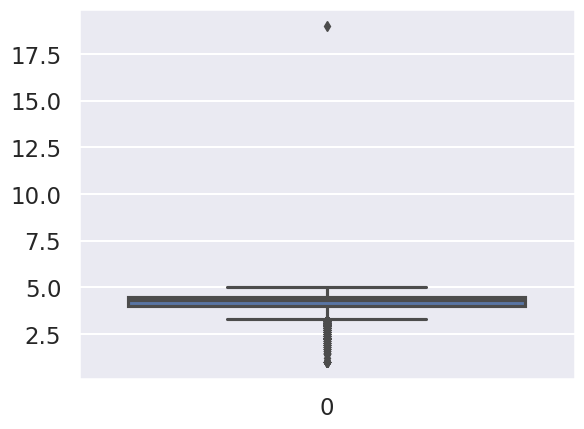

In [ ]:
sns.boxplot(DF_GP['Rating'])

In [ ]:
np.mean(DF_GP['Rating'])

4.189542336669291

In [ ]:
DF_GP['Rating'] = DF_GP['Rating'].fillna(np.mean(DF_GP['Rating']))

In [ ]:
DF_GP['Rating'].isnull().sum()

0

In [ ]:
#En la columna REVIEWS buscamos los valores que no son únicamente númericos.

DF_GP[~DF_GP['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Modificamos nuestro valor y continuamos con la siguiente columna.

DF_GP['Reviews'] = DF_GP['Reviews'].replace('3.0M','3000000')

In [ ]:
DF_GP['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#En la columna SIZE notamos que tenemos k y M refiriendose a Kilobyte y Megabyte respectivamente.
#Convertiremos toda la data en kb.
# 1 mb = 1024 kb

In [ ]:
def convert_to_kb(size):
    if 'M' in size:

        mb_value = size.split('M')[0]
        kb_value = float(mb_value) * 1024  # 1 MB = 1024 KB
        kb_value = str(f'{kb_value} k')
        return kb_value
    else:
        return size

In [ ]:
DF_GP['Size'] = DF_GP['Size'].apply(convert_to_kb)

In [ ]:
DF_GP['Size'].unique()

array(['19456.0 k', '14336.0 k', '8908.8 k', '25600.0 k', '2867.2 k',
       '5734.4 k', '29696.0 k', '33792.0 k', '3174.4 k', '28672.0 k',
       '12288.0 k', '20480.0 k', '21504.0 k', '37888.0 k', '2764.8 k',
       '5632.0 k', '17408.0 k', '39936.0 k', '31744.0 k', '4300.8 k',
       '7168.0 k', '23552.0 k', '6144.0 k', '6246.4 k', '4710.4 k',
       '9420.8 k', '5324.8 k', '11264.0 k', '24576.0 k',
       'Varies with device', '9625.6 k', '15360.0 k', '10240.0 k',
       '1228.8 k', '26624.0 k', '8192.0 k', '8089.6 k', '57344.0 k',
       '58368.0 k', '35840.0 k', '55296.0 k', '201k', '3686.4 k',
       '5836.8 k', '8806.4 k', '2457.6 k', '27648.0 k', '2560.0 k',
       '16384.0 k', '3481.6 k', '9113.6 k', '3993.6 k', '2969.6 k',
       '38912.0 k', '32768.0 k', '5529.6 k', '18432.0 k', '1126.4 k',
       '2252.8 k', '4608.0 k', '10035.2 k', '53248.0 k', '9216.0 k',
       '6860.8 k', '30720.0 k', '2662.4 k', '7270.4 k', '3788.8 k',
       '22528.0 k', '7577.6 k', '6553.6 k', '3276

In [ ]:
#Eliminamos la k para unicamente visualizar las cantidades.
DF_GP['Size']=DF_GP['Size'].str.replace('k','')

In [ ]:
DF_GP['Size'].unique()

array(['19456.0 ', '14336.0 ', '8908.8 ', '25600.0 ', '2867.2 ',
       '5734.4 ', '29696.0 ', '33792.0 ', '3174.4 ', '28672.0 ',
       '12288.0 ', '20480.0 ', '21504.0 ', '37888.0 ', '2764.8 ',
       '5632.0 ', '17408.0 ', '39936.0 ', '31744.0 ', '4300.8 ',
       '7168.0 ', '23552.0 ', '6144.0 ', '6246.4 ', '4710.4 ', '9420.8 ',
       '5324.8 ', '11264.0 ', '24576.0 ', 'Varies with device', '9625.6 ',
       '15360.0 ', '10240.0 ', '1228.8 ', '26624.0 ', '8192.0 ',
       '8089.6 ', '57344.0 ', '58368.0 ', '35840.0 ', '55296.0 ', '201',
       '3686.4 ', '5836.8 ', '8806.4 ', '2457.6 ', '27648.0 ', '2560.0 ',
       '16384.0 ', '3481.6 ', '9113.6 ', '3993.6 ', '2969.6 ', '38912.0 ',
       '32768.0 ', '5529.6 ', '18432.0 ', '1126.4 ', '2252.8 ', '4608.0 ',
       '10035.2 ', '53248.0 ', '9216.0 ', '6860.8 ', '30720.0 ',
       '2662.4 ', '7270.4 ', '3788.8 ', '22528.0 ', '7577.6 ', '6553.6 ',
       '3276.8 ', '8396.8 ', '10137.6 ', '5017.6 ', '9728.0 ', '5120.0 ',
       '6041.6 

In [ ]:
#Eliminamos valor no numérico.
DF_GP = DF_GP[~DF_GP['Size'].str.contains('Varies with device')]

In [ ]:
DF_GP = DF_GP.reset_index(drop=True)

In [ ]:
DF_GP['Size'].unique()

array(['19456.0 ', '14336.0 ', '8908.8 ', '25600.0 ', '2867.2 ',
       '5734.4 ', '29696.0 ', '33792.0 ', '3174.4 ', '28672.0 ',
       '12288.0 ', '20480.0 ', '21504.0 ', '37888.0 ', '2764.8 ',
       '5632.0 ', '17408.0 ', '39936.0 ', '31744.0 ', '4300.8 ',
       '7168.0 ', '23552.0 ', '6144.0 ', '6246.4 ', '4710.4 ', '9420.8 ',
       '5324.8 ', '11264.0 ', '24576.0 ', '9625.6 ', '15360.0 ',
       '10240.0 ', '1228.8 ', '26624.0 ', '8192.0 ', '8089.6 ',
       '57344.0 ', '58368.0 ', '35840.0 ', '55296.0 ', '201', '3686.4 ',
       '5836.8 ', '8806.4 ', '2457.6 ', '27648.0 ', '2560.0 ', '16384.0 ',
       '3481.6 ', '9113.6 ', '3993.6 ', '2969.6 ', '38912.0 ', '32768.0 ',
       '5529.6 ', '18432.0 ', '1126.4 ', '2252.8 ', '4608.0 ', '10035.2 ',
       '53248.0 ', '9216.0 ', '6860.8 ', '30720.0 ', '2662.4 ', '7270.4 ',
       '3788.8 ', '22528.0 ', '7577.6 ', '6553.6 ', '3276.8 ', '8396.8 ',
       '10137.6 ', '5017.6 ', '9728.0 ', '5120.0 ', '6041.6 ', '13312.0 ',
       '74752.

In [ ]:
DF_GP['Size']=DF_GP['Size'].replace('1,000+','1000')
DF_GP['Size']=DF_GP['Size'].astype(float)


In [ ]:
DF_GP['Size'].isnull().sum()

0

<Axes: >

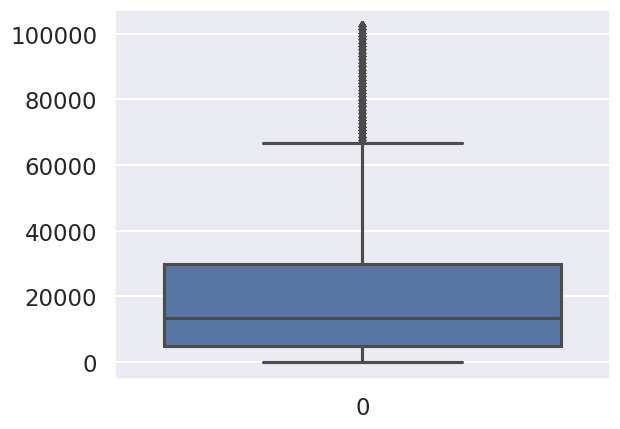

In [ ]:
sns.boxplot(DF_GP['Size'])

In [ ]:
median_size = DF_GP['Size'].median()
DF_GP['Size'] = DF_GP['Size'].fillna(median_size)

In [ ]:
DF_GP['Size'].isnull().sum()

0

<Axes: >

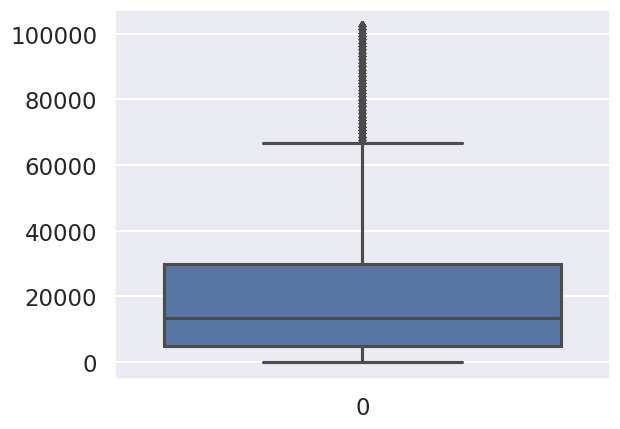

In [ ]:
sns.boxplot(DF_GP['Size'])

In [ ]:
DF_GP['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'],
      dtype=object)

In [ ]:
DF_GP['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+', 'Free'], dtype=object)

In [ ]:
#Limpiamos símbolos, valores no numéricos y valores faltantes.
chars_to_remove = ['+',',','$']
coloumns_to_clean = ['Installs','Price']
for item in chars_to_remove:
    for coloumns in coloumns_to_clean:
        DF_GP[coloumns] = DF_GP[coloumns].str.replace(item,'')

In [ ]:
DF_GP['Price'] = DF_GP['Price'].replace('Everyone',0)

In [ ]:
DF_GP['Price'] = DF_GP['Price'].astype(float)

In [ ]:
DF_GP['Installs'] = DF_GP['Installs'].replace('Free',np.nan)

In [ ]:
DF_GP['Installs'].isnull().sum()

1

In [ ]:
DF_GP['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '50', '100', '500', '10', '1', '5', '1000000000', '0', nan],
      dtype=object)

In [ ]:
installs_median = DF_GP['Installs'].median()

In [ ]:
DF_GP['Installs'] = DF_GP['Installs'].fillna(installs_median)

In [ ]:
DF_GP['Installs']=DF_GP['Installs'].astype(int)

In [ ]:
DF_GP['Installs'].isnull().sum()

0

In [ ]:
#Modificamos y limpiamos columna Last Updated.
DF_GP['last_Updated_Month']=DF_GP['Last Updated'].str.split(' ').str[0]
DF_GP['last_Updated_Day']=DF_GP['Last Updated'].str.split(' ').str[1]
DF_GP['last_Updated_Day']=DF_GP['last_Updated_Day'].str.split(',').str[0]
DF_GP['last_Updated_year']=DF_GP['Last Updated'].str.split(',').str[1]

In [ ]:
DF_GP['last_Updated_Month'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February', '1.0.19'],
      dtype=object)

In [ ]:
DF_GP['last_Updated_Month'] = DF_GP['last_Updated_Month'].replace('1.0.19','October')

In [ ]:
DF_GP['last_Updated_Day'].unique()

array(['7', '15', '1', '8', '20', '26', '14', '3', '27', '31', '2', '6',
       '30', '12', '25', '11', '21', '22', '19', '29', '17', '28', '10',
       '18', '16', '4', '24', '23', '9', '5', '13', nan], dtype=object)

In [ ]:
DF_GP['last_Updated_Day'] = DF_GP['last_Updated_Day'].fillna(1)

In [ ]:
DF_GP['last_Updated_year'].unique()

array([' 2018', ' 2017', ' 2014', ' 2016', ' 2015', ' 2013', ' 2012',
       ' 2011', ' 2010', nan], dtype=object)

In [ ]:
DF_GP['last_Updated_year'] = DF_GP['last_Updated_year'].fillna(2019)

In [ ]:
DF_GP = DF_GP.drop('Last Updated',axis = 1)

In [ ]:
DF_GP.dtypes

App                    object
Category               object
Rating                float64
Reviews                object
Size                  float64
Installs                int64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month     object
last_Updated_Day       object
last_Updated_year      object
dtype: object

In [ ]:
DF_GP['Reviews'] = DF_GP['Reviews'].astype(float)
DF_GP['last_Updated_Day'] = DF_GP['last_Updated_Day'].astype(float)
DF_GP['last_Updated_year'] = DF_GP['last_Updated_year'].astype(float)

In [ ]:
#Ordenamos los meses del año.
DF_GP['last_Updated_Month']=DF_GP['last_Updated_Month'].map({'January':1,'February':2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12})

In [ ]:
DF_GP.dtypes

App                    object
Category               object
Rating                float64
Reviews               float64
Size                  float64
Installs                int64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month      int64
last_Updated_Day      float64
last_Updated_year     float64
dtype: object

In [ ]:
DF_GP.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        1
Genres                0
Current Ver           8
Android Ver           3
last_Updated_Month    0
last_Updated_Day      0
last_Updated_year     0
dtype: int64

In [ ]:
DF_GP['Type'] = DF_GP['Type'].fillna(DF_GP['Type'].mode().iloc[0])

In [ ]:
DF_GP.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        1
Genres                0
Current Ver           8
Android Ver           3
last_Updated_Month    0
last_Updated_Day      0
last_Updated_year     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
DF_GP['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [ ]:
DF_GP['Type'] = DF_GP['Type'].replace('0','Free')

In [ ]:
DF_GP['Type'] = encoder.fit_transform(DF_GP['Type'])

In [ ]:
DF_GP['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
DF_GP['Content Rating'] = encoder.fit_transform(DF_GP['Content Rating'])

In [ ]:
DF_GP['Content Rating'].unique()

array([1, 4, 2, 3, 0, 5, 6])

In [ ]:
#Iniciamos limpieza del segundo Dataset y unimos con el primero.
DF_GP_reviews= pd.read_csv('/content/googleplaystore_user_reviews.csv', delimiter=',', encoding = "latin" )

In [ ]:
DF_GP_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
DF_GP_reviews.head()
#Polaridad del sentimiento: 0 = Neutral, > 0 = Positivo, < 0 = Negativo.

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
DF_GP_reviews = DF_GP_reviews.drop_duplicates()

In [ ]:
#Unión de datasets en uno sólo.
merged_df = pd.merge(DF_GP, DF_GP_reviews, how='inner')

display(merged_df)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000,0,0.0,1,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15.0,2018.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000,0,0.0,1,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15.0,2018.0,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000,0,0.0,1,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15.0,2018.0,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000,0,0.0,1,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15.0,2018.0,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000,0,0.0,1,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15.0,2018.0,I love colors inspyering,Positive,0.500000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27357,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,93184.0,10000000,0,0.0,4,Role Playing,1.021.10,4.1 and up,7,3.0,2018.0,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
27358,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,93184.0,10000000,0,0.0,4,Role Playing,1.021.10,4.1 and up,7,3.0,2018.0,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
27359,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,93184.0,10000000,0,0.0,4,Role Playing,1.021.10,4.1 and up,7,3.0,2018.0,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
27360,Avakin Life - 3D virtual world,FAMILY,4.4,1275373.0,93184.0,10000000,0,0.0,4,Role Playing,1.021.10,4.1 and up,7,3.0,2018.0,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000


In [ ]:
DF_sentimiento=merged_df[['Translated_Review','Sentiment',"App"]].dropna().copy()

In [ ]:
DF_sentimiento['Sentiment'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
DF_sentimiento

,Translated_Review,Sentiment,App
0,A kid's excessive ads. The types ads allowed a...,Negative,Coloring book moana
1,It bad >:(,Negative,Coloring book moana
2,like,Neutral,Coloring book moana
4,I love colors inspyering,Positive,Coloring book moana
5,I hate,Negative,Coloring book moana
...,...,...,...
27357,This turned better I expected tbh I'm glad. I'...,Positive,Avakin Life - 3D virtual world
27358,I like apartments n stuffs minus players Many ...,Negative,Avakin Life - 3D virtual world
27359,Hey I've playing year half last year I took 2 ...,Positive,Avakin Life - 3D virtual world
27360,"Annoying loading. It stopped 80 percent, data ...",Negative,Avakin Life - 3D virtual world


In [ ]:
DF_sentimiento['Sentiment'] = encoder.fit_transform(DF_sentimiento['Sentiment']).copy()

In [ ]:
DF_sentimiento['Sentiment'].unique()

array([0, 1, 2])

In [ ]:
#Prepocesamiento de nuevo dataset, con una "técnica" distinta a la anterior.
import re

def preprocesamiento (review):
  review = re.sub ( re.compile ('((http|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?)'), ' ', review)
  review = re.sub ( re.compile ('\d'), ' ', review)
  review = re.sub ( re.compile ('[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']'), ' ', review)
  review = re.sub ( re.compile (' +'), ' ', review)

  return review

In [ ]:
DF_sentimiento['Sentiment'] = DF_sentimiento['Sentiment'].astype(float).copy()

In [ ]:
DF_sentimiento['Translated_Review'][42]

"It's...a coloring book ap. And I like adult coloring books. It's easy (I try moving around end coloring something I want color), least fixing mistakes easy enough. I love color options. However, despite that, I can't complain. My biggest compla... Full Review"

In [ ]:
preprocesamiento(DF_sentimiento['Translated_Review'][42])

'It s a coloring book ap And I like adult coloring books It s easy I try moving around end coloring something I want color least fixing mistakes easy enough I love color options However despite that I can t complain My biggest compla Full Review'

In [ ]:
#Ahora, importamos NLTK para utilizar el tokenizador y eliminar las stopwords.

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Definimos nuestra función para tokenizar y eliminar stopwords.

def token_stop (review):
  tokens = nltk.word_tokenize (review) #Creamos vocabulario
  stop_words = stopwords.words ('english')
  lista_tokens = [token for token in tokens if token not in stop_words]
  return' '.join(lista_tokens)

In [ ]:
#Aplicamos las funciones de preprocesamiento y token_stop a todos las reviewa del dataset.
#Creamos Df con todos nuestros textos limpios, terminando así la limpieza de datos.

DF_sentimiento['reviewlimpio']=DF_sentimiento['Translated_Review'].apply(lambda review:token_stop(preprocesamiento(review)))

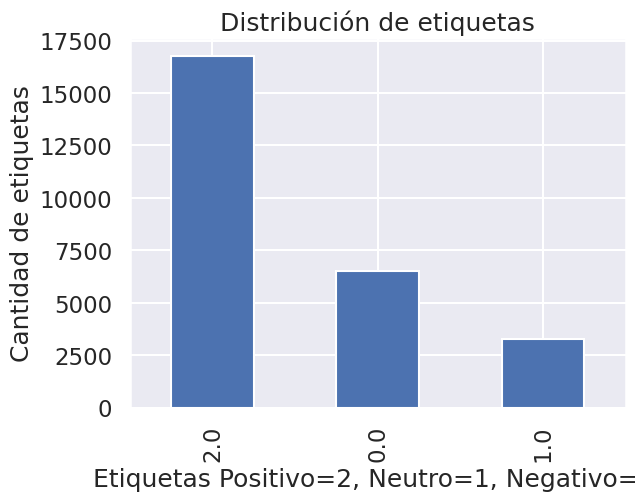

In [ ]:
#Generamos gráfica para ver la distribución de los reviews.

DF_sentimiento['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribución de etiquetas' )
plt.xlabel('Etiquetas Positivo=2, Neutro=1, Negativo=0 ')
plt.ylabel('Cantidad de etiquetas')

#Guardar imagen en computadora
plt.savefig("my_plot2.jpg")
plt.show()

In [ ]:
from wordcloud import WordCloud

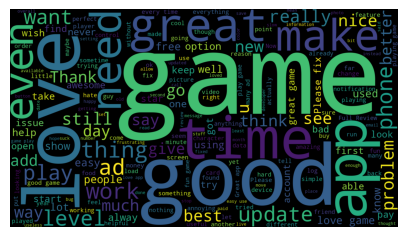

In [ ]:
#Las palabras más usadas en los reviews.
plt.subplots(figsize=(5,5))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(DF_sentimiento.reviewlimpio))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
DF_sentimiento.head()

,Translated_Review,Sentiment,App,reviewlimpio
0,A kid's excessive ads. The types ads allowed a...,0.0,Coloring book moana,A kid excessive ads The types ads allowed app ...
1,It bad >:(,0.0,Coloring book moana,It bad
2,like,1.0,Coloring book moana,like
4,I love colors inspyering,2.0,Coloring book moana,I love colors inspyering
5,I hate,0.0,Coloring book moana,I hate


##Análisis de datos.

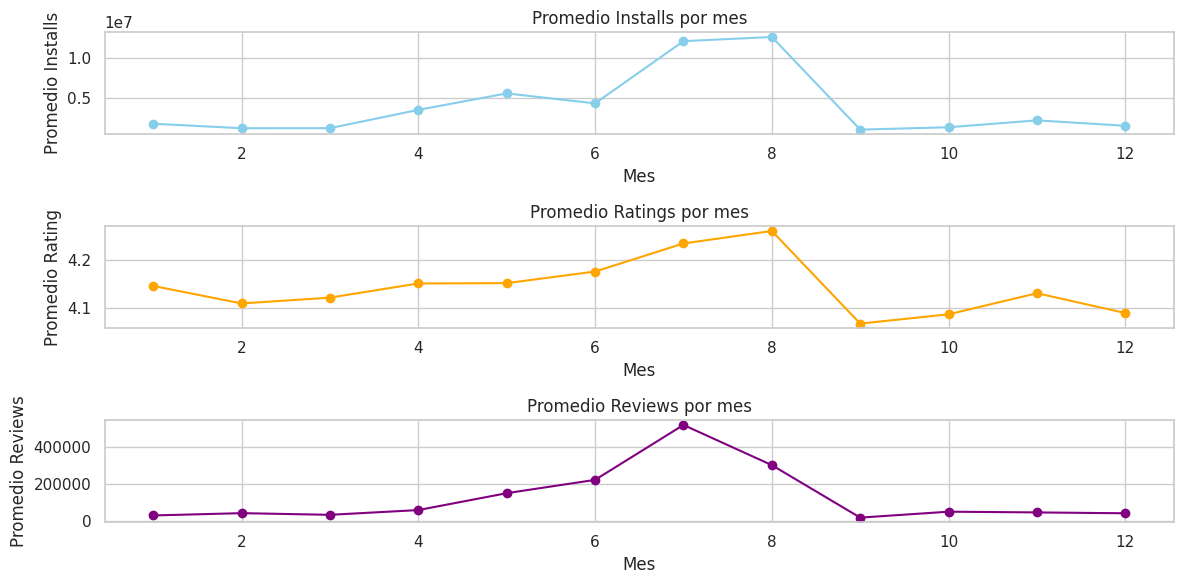

In [ ]:
# Extraemos columnas relevantes para conocer los meses donde la gente tiene mayor actividad en la google store.

launch_data = DF_GP[['last_Updated_Month', 'last_Updated_Day', 'last_Updated_year', 'Installs', 'Rating', 'Reviews']]

# Analisis de las series de tiempo
monthly_avg_installs = launch_data.groupby('last_Updated_Month')['Installs'].mean()
monthly_avg_ratings = launch_data.groupby('last_Updated_Month')['Rating'].mean()
monthly_avg_reviews = launch_data.groupby('last_Updated_Month')['Reviews'].mean()

# Plots de las series de tiempo
plt.figure(figsize=(12, 6))
plt.subplot(311)
monthly_avg_installs.plot(kind='line', marker='o', color='skyblue')
plt.title('Promedio Installs por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio Installs')

plt.subplot(312)
monthly_avg_ratings.plot(kind='line', marker='o', color='orange')
plt.title('Promedio Ratings por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio Rating')

plt.subplot(313)
monthly_avg_reviews.plot(kind='line', marker='o', color='purple')
plt.title('Promedio Reviews por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio Reviews')

plt.tight_layout()
plt.savefig('Meses más activos.jpg')
plt.show()

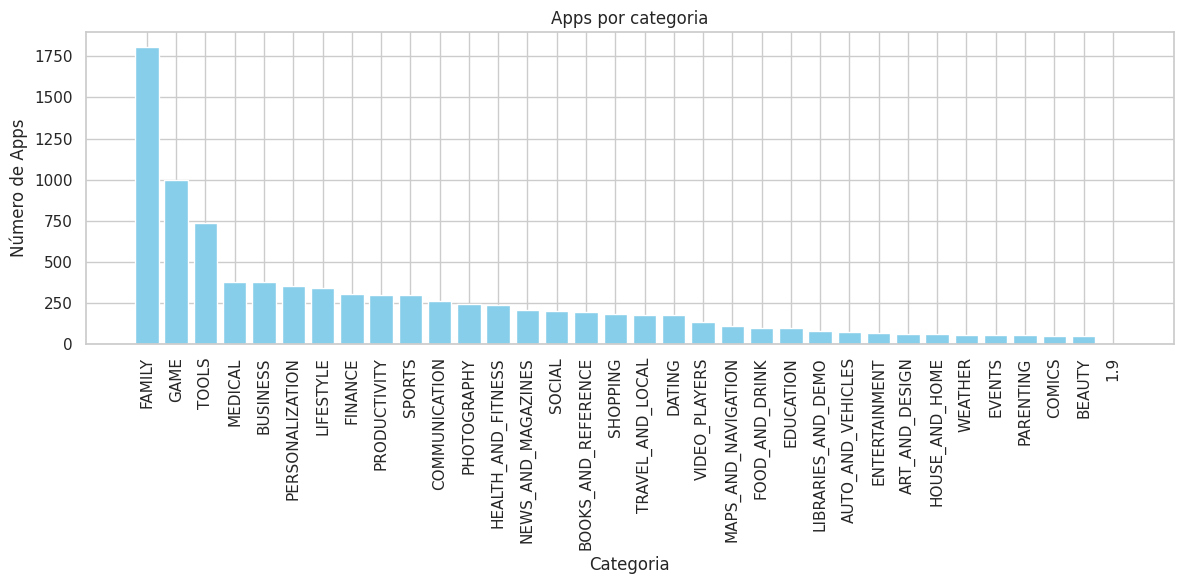

In [ ]:
# Análisis por categoria
category_counts = DF_GP['Category'].value_counts()
# Distribución de las apps por categoria
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Número de Apps')
plt.title('Apps por categoria')
plt.tight_layout()
plt.savefig('Apps por categoria.jpg')
plt.show()


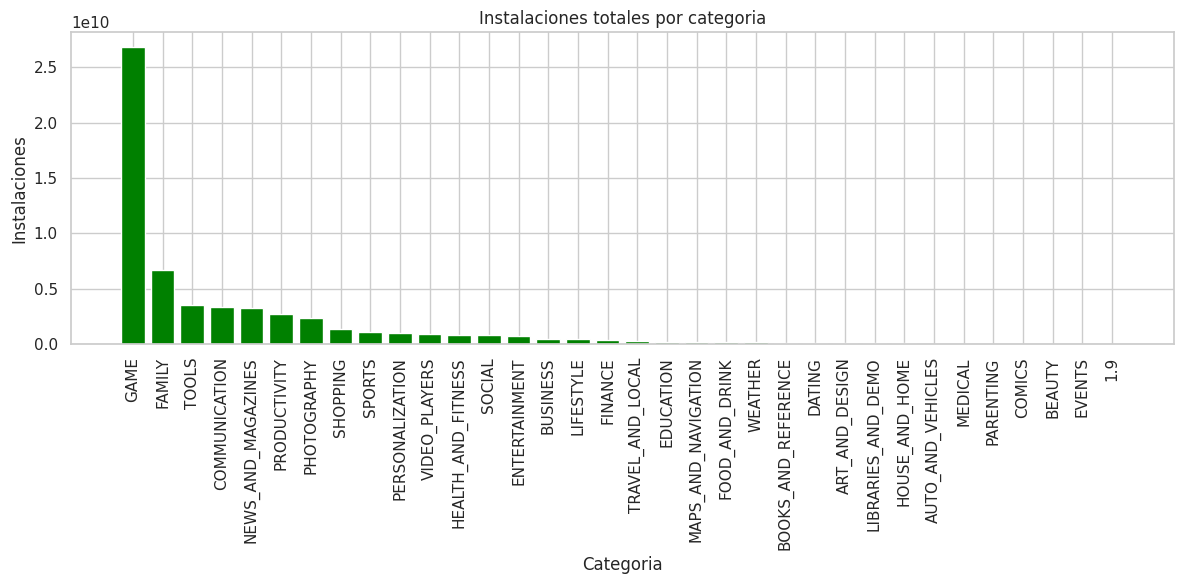

In [ ]:
# Análisis por instalaciones
install_counts = DF_GP.groupby('Category')['Installs'].sum().sort_values(ascending=False)
# Plot de instalaciones totales
plt.figure(figsize=(12, 6))
plt.bar(install_counts.index, install_counts.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Instalaciones')
plt.title('Instalaciones totales por categoria')
plt.tight_layout()
plt.savefig('Instalaciones totales por categoria.jpg')
plt.show()


In [ ]:
# Identificamos la categoria más populares basandonos en su categoria
most_popular_category = install_counts.idxmax()
print(f"The most popular app category is '{most_popular_category}'")

The most popular app category is 'GAME'


In [ ]:
#Número de apps con calificación 5 estrellas
df_rating_5 = DF_GP[DF_GP.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 266 apps having rating of 5.0


In [ ]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

In [ ]:
# Top 10 categorias con más apps calificadas con 5
category = pd.DataFrame(df_rating_5['Category'].value_counts())
category.rename(columns = {'Category':'Count'},inplace=True)
category

,Count
FAMILY,65
LIFESTYLE,29
MEDICAL,25
BUSINESS,18
TOOLS,17
GAME,12
HEALTH_AND_FITNESS,12
PERSONALIZATION,10
SOCIAL,8
PRODUCTIVITY,8


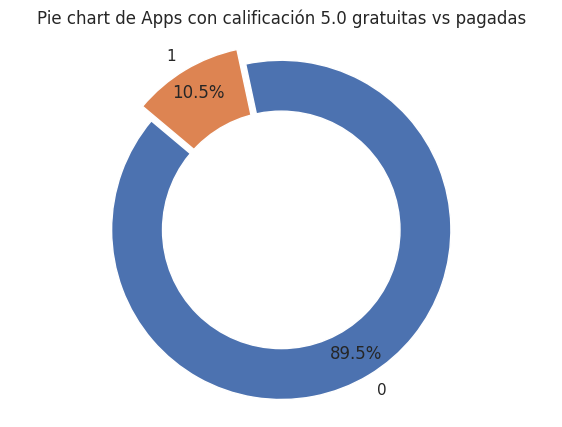

In [ ]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

# Creamos un pie chart
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")

# Datos para gráfica
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Muestra resaltada de un valor.
explode = (0, 0.1)  # Ajustamos el segundo valor para ajustar  "resaltado"

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Genera la gráfica como dona.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Aseguramos sea dibujado como un círculo perfecto.
plt.axis('equal')

plt.title('Pie chart de Apps con calificación 5.0 gratuitas vs pagadas')
plt.savefig('Apps de pagavsGratis.jpg')
plt.show()

In [ ]:
#Apps con más descargas y Rating 5
DF_Canti = df_rating_5.sort_values(by='Installs', ascending=False)


top_10_cat = DF_Canti[['App','Rating',"Installs"]].head(10)

top_10_cat = top_10_cat.reset_index(drop=True)

print(top_10_cat)

                                                App  Rating  Installs
0                          Ek Bander Ne Kholi Dukan     5.0     10000
1           CL Keyboard - Myanmar Keyboard (No Ads)     5.0      5000
2                                       OraciÃ³n CX     5.0      5000
3  Superheroes, Marvel, DC, Comics, TV, Movies News     5.0      5000
4                      Hojiboy Tojiboyev Life Hacks     5.0      1000
5                                      Bk Usha behn     5.0      1000
6                                 CT Cervical Spine     5.0      1000
7                 BP Journal - Blood Pressure Diary     5.0      1000
8                              CARDIAC CT TECHNIQUE     5.0      1000
9                        Dine In CT - Food Delivery     5.0      1000


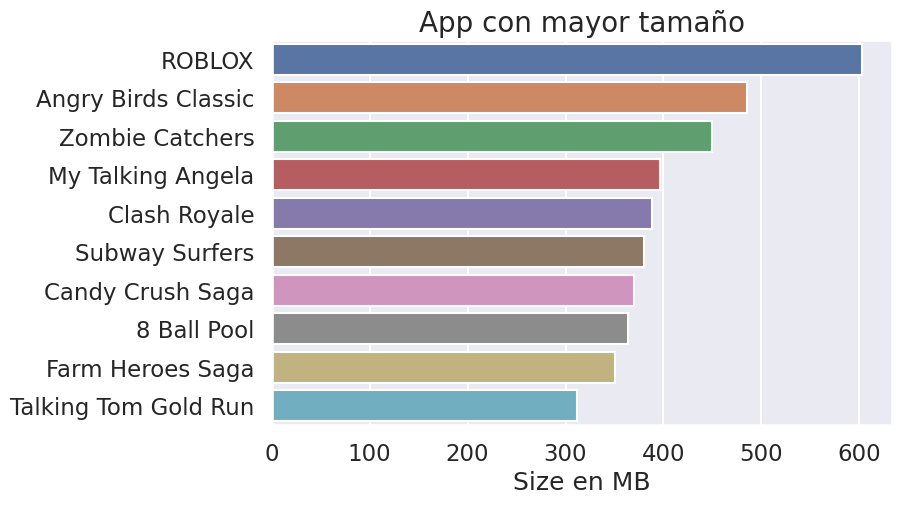

In [ ]:
df_largest_size = DF_GP.groupby(['App'])['Size'].sum().sort_values(ascending = False).reset_index()
df_largest_size.Size = df_largest_size.Size/1024# Convertimos a MB para mejor represntación de esta gráfica
df2 = df_largest_size.head(10)
plt.figure(figsize = (8,5))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Size' , y = 'App' , data = df2 )
ax.set_xlabel('Size en MB')
ax.set_ylabel('')
ax.set_title("App con mayor tamaño", size = 20)
plt.savefig('App x size.jpg')

##Preparando datos para evaluación


In [ ]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

In [ ]:
target = 'Rating'
X = DF_GP.copy().drop(pruned_features+[target], axis=1)
y = DF_GP.copy()[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
le_dict = defaultdict()
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Ajustando y transformando datos de entrenamiento
    X_train[col] = X_train[col].astype('category') # Convertimos de tipo numérico a tipo categórico

    X_test[col] = le.transform(X_test[col]) # Transformamos datos de prueba
    X_test[col] = X_test[col].astype('category') # Convertimos de tipo numérico a tipo categórico

    le_dict[col] = le # Guardamos el label encoder por caracterisitcas individuales

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Listado de características numéricas a escalar
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [ ]:
scaler = StandardScaler()

# Ajustando y transformando datos de entrenamiento
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])


# Transformamos datos de prueba
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


##Evaluación Modelo de Regresión


In [ ]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [ ]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [ ]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [ ]:
#Redondeamos parámetros

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.530
                      MAE     0.334
                      R2      0.028
              test    RMSE    0.481
                      MAE     0.314
                      R2      0.029
KNN           train   RMSE    0.456
                      MAE     0.302
                      R2      0.281
              test    RMSE    0.523
                      MAE     0.356
                      R2     -0.145
Random Forest train   RMSE    0.498
                      MAE     0.327
                      R2      0.142
              test    RMSE    0.477
                      MAE     0.310
                      R2      0.044

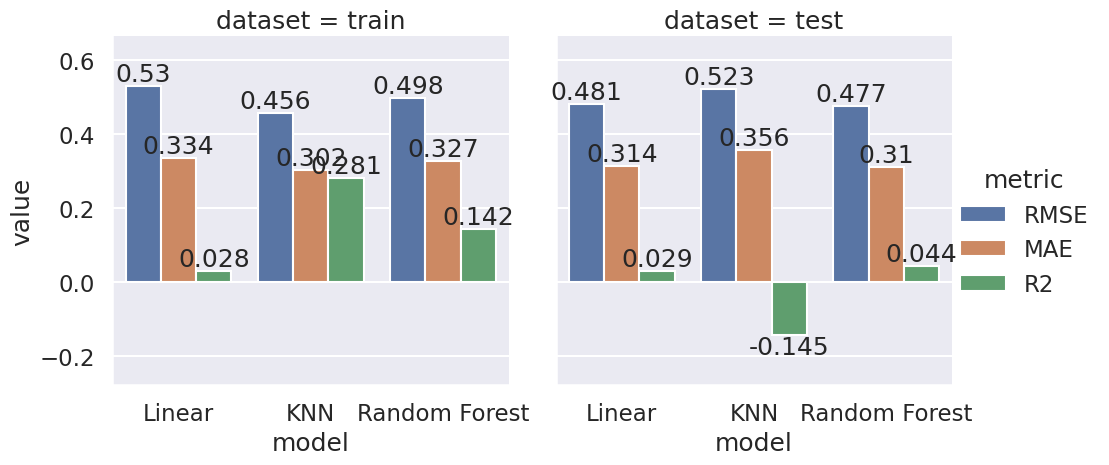

In [ ]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# iteramos
for ax in g.axes.ravel():
    # labels
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)
plt.savefig('Evaluación Regresión.jpg')
plt.show()

##Evaluación Modelo Categórico

In [ ]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [ ]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [ ]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [ ]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [ ]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [ ]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

In [ ]:
# redondeamos y cambiamos a porcentajes.
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         76.48
                    test          79.34
KNN                 train         78.80
                    test          75.16
Random Forest       train         99.99
                    test          79.12

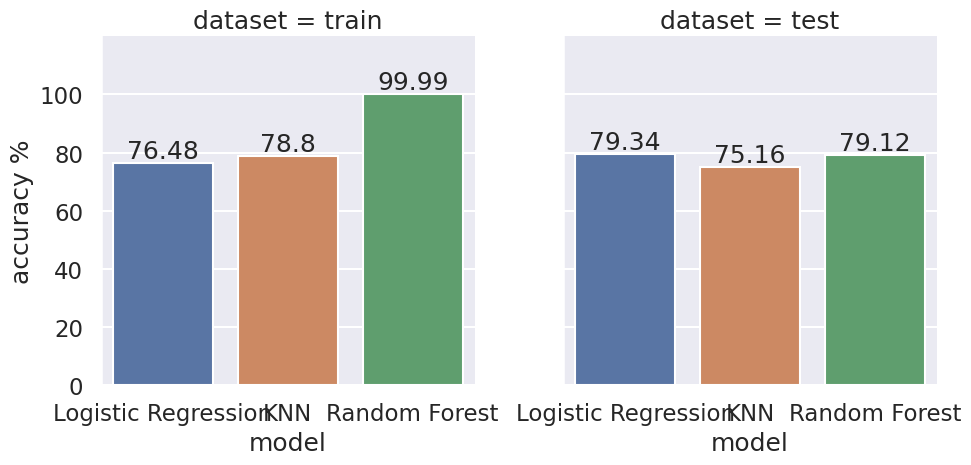

In [ ]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')


for ax in g.axes.ravel():

    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)
plt.savefig('Evaluación Clasificacion.jpg')
plt.show()

##Modelo predictivo.

In [ ]:
#Partimos nuestro data set en test/train.

from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(DF_sentimiento['reviewlimpio'], DF_sentimiento['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Bola de palabras con TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf_train = vectorizer.fit_transform(df_train)
X_tfidf_test = vectorizer.transform(df_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

In [ ]:
lr.fit(X_tfidf_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions_tfidf = lr.predict(X_tfidf_test)

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(predictions_tfidf,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1137
         1.0       0.75      0.84      0.79       575
         2.0       0.97      0.91      0.94      3593

    accuracy                           0.90      5305
   macro avg       0.84      0.89      0.86      5305
weighted avg       0.91      0.90      0.91      5305



In [ ]:
predicción_ejemplo ="A kid excessive ads The types ads allowed app"

# Pasamos nuestro texto en modelo y recibimos predicción.

vector_predicción_ejemplo=vectorizer.transform([predicción_ejemplo])

sentimiento=lr.predict(vector_predicción_ejemplo)

print('La opinion tiene un sentimiento: ', 'negativo' if sentimiento ==0  else 'positivo')

La opinion tiene un sentimiento:  negativo


In [ ]:
predicción_ejemplo2 ="This help eating healthy exercise regular basis"

# Pasamos nuestro texto en modelo y recibimos predicción.

vector_predicción_ejemplo=vectorizer.transform([predicción_ejemplo])

sentimiento=lr.predict(vector_predicción_ejemplo)

print('La opinion tiene un sentimiento: ', 'negativo' if sentimiento ==0  else 'positivo')

La opinion tiene un sentimiento:  negativo
